In [1]:
from delta_bulk import *

2024-09-18 00:54:53.843618: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.68). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
with open("delta_bulk_1726584467.5956047.pkl", "rb") as f:
    data = pickle.load(f)

print(data)

{'symmetric': True, 'canonicalize': False, 'aligned': True, 'delta_bulks': Array([[-1.1960341e-03,  4.7091188e-04,  9.5689128e-04, ...,
        -6.1697447e-06, -1.1675453e-05,  5.8049827e-06],
       [ 1.3619699e-03, -8.5998839e-04, -3.0566793e-04, ...,
         2.8423116e-05,  2.6712756e-05, -6.9486164e-06],
       [-8.3080743e-04, -4.0815197e-04, -7.6364668e-05, ...,
         4.4501525e-05,  4.3573760e-05, -1.9222136e-05],
       ...,
       [ 5.5929285e-04,  8.0412795e-04,  8.8316377e-04, ...,
        -1.1356422e-05, -9.1611510e-06,  1.1044276e-05],
       [ 1.1526232e-03,  1.8599018e-04,  1.7479589e-04, ...,
         5.2014344e-05, -7.7330697e-06,  3.8690858e-05],
       [ 5.4587610e-04,  6.2748813e-04,  9.7122852e-04, ...,
         1.1506224e-05,  3.2652792e-05, -9.9428726e-06]], dtype=float32)}


In [5]:
db = data['delta_bulks']

In [18]:
# open every pkl file in the directory
import glob
files = glob.glob("*.pkl")
for file in files:
    print()
    #print(file)
    with open(file, "rb") as f:
        data = pickle.load(f)
    db = data['delta_bulks']
    n = db.shape[0]
    # if n > 100:
    #     db = db[:100]
    #     n = 100
    print(f'n = {n}')
    print([k for k in data.keys() if k != 'delta_bulks' and data[k]])

    mean = np.mean(db, axis=0)
    print(np.sum(mean**2) / np.mean(np.sum(db**2, axis=1)) - 1/(n))


n = 16
[]
0.0015814677

n = 16
['aligned']
0.0036289096

n = 16
['canonicalize', 'aligned']
0.0040753856

n = 400
[]
0.0013575461

n = 400
['aligned']
0.0022507259

n = 400
['canonicalize', 'aligned']
0.002232391

n = 400
['symmetric', 'canonicalize', 'aligned']
0.0025880416

n = 400
['symmetric', 'aligned']
0.0025422224


In [45]:
# bootstrap estimate of the mean
mean = np.mean(db, axis=0)

# boots = np.random.choice(db, size=(1000, db.shape[1]), replace=True)

In [46]:
np.sum(np.mean(db, axis=0)**2)

Array(2.1635191e-05, dtype=float32)

In [47]:
np.sum(mean**2) / np.mean(np.sum(db**2, axis=1)) - 1/399

Array(0.00253596, dtype=float32)

In [48]:
# covariance matrix
cov = np.cov(db, rowvar=False)
np.sum(np.diag(cov)) / np.mean(np.sum(db**2, axis=1))

Array(0.9974514, dtype=float32)

In [49]:
mean100 = np.mean(db[:100], axis=0)
np.sum(mean100**2)
np.sum(mean100**2) / np.mean(np.sum(db[:100]**2, axis=1)) - 1/99

Array(0.00269872, dtype=float32)

In [32]:
# numpy.random.Generator.choice

g = np.random.default_rng(12345)
boots = g.choice(db, size=(1000, 400), replace=True)

boots.shape

(1000, 400, 9610)

In [50]:
np.sum(mean**2) / np.mean(np.sum(db**2, axis=1)) 

Array(0.00504222, dtype=float32)

In [55]:
np.mean(means) / np.sum(mean**2)

Array(1.4895207, dtype=float32)

In [54]:
np.sum(mean**2)

Array(2.1635191e-05, dtype=float32)

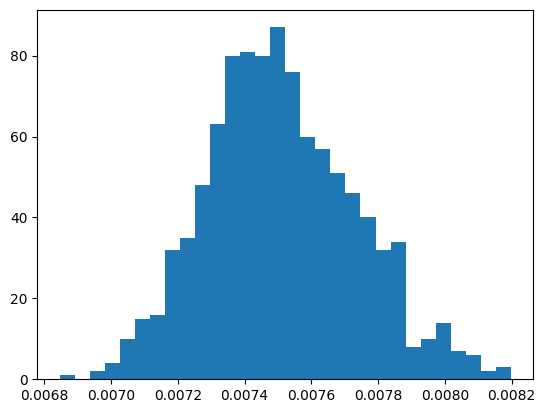

In [71]:
var = np.mean(np.sum(db**2, axis=1))  # np.mean(np.sum(boots**2, axis=2), axis=1)
means = np.sum(np.mean(boots, axis=1)**2, axis=1)
plt.hist(means / var, bins=30)
plt.show()

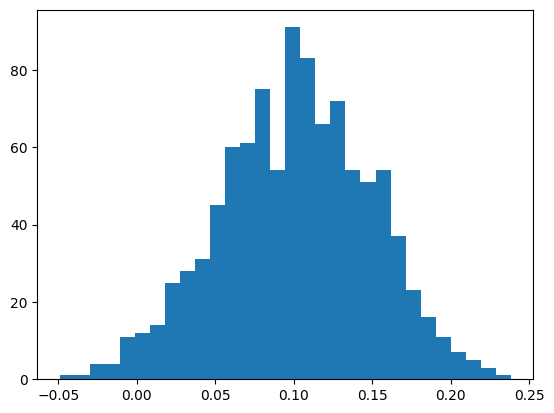

In [73]:

var = np.mean((db[:, 0]**2))  # np.mean(np.sum(boots**2, axis=2), axis=1)
means = (np.mean(boots[:, :, 0], axis=1))
plt.hist(means / np.sqrt(var), bins=30)
plt.show()

In [86]:
T = 400 * np.sum(mean**2) - np.trace(cov)
T = T / 400

In [87]:
VarT = (2/400) * np.sum(cov**2)
Z = T / np.sqrt(VarT)

In [88]:
Z

Array(0.6771072, dtype=float32)

In [85]:
T, VarT, Z

(Array(0.00437421, dtype=float32),
 np.float64(1.0433353106782822e-07),
 Array(13.542145, dtype=float32))